Implementing bucket sort

In [57]:
import math
import numpy as np

def insertion_sort(list):
#     print("*** PERFORMING INSERTION SORT ***")
    for j in range (1, len(list)):
        # determine the key
        key = list[j]
        # set i to find preceeding element
        i = j - 1

        while i >= 0 and list[i] > key:
            # replace the suceeding element by preceeding if it is greater than key
            list[i + 1] = list[i]
            i = i - 1
        list[i + 1] = key

#     print("List Sorted in ascending order by insertion sort is :", list)


def bucket_sort(A):
    
    sorted_array = []
    n = len(A)
    bucket = [[] for _ in range(n)]
    
    for i in range(n):
        bucket[math.floor(n * A[i]/10**len(str(A[i])))].append(A[i])
    
    for i in range(n):
        insertion_sort(bucket[i])
        sorted_array = sorted_array + bucket[i]
    return sorted_array
        

In [58]:
A = [0.79, 0.13, 0.16, 0.64, 0.39, 0.20, 0.89, 0.53, 0.71, 0.42]
# A = [9.8, 0.6, 10.1, 1.9, 3.07, 3.04, 5.0, 8.0, 4.8, 7.68]
sorted_array = bucket_sort(A)
print("Sorted array is:", sorted_array)

Sorted array is: [0.13, 0.16, 0.2, 0.39, 0.42, 0.53, 0.64, 0.71, 0.79, 0.89]


Implementing counting sort

In [59]:
def counting_sort(A):
    k = max(A)
    C = [None]*(k+1)
    B = [None]*len(A)
    
    for i in range(k+1):
        C[i] = 0
    for j in range(len(A)):
        C[A[j]] = C[A[j]] + 1
    for i in range(1,k+1):
        C[i] = C[i] + C[i-1]
    for j in range(len(A)-1,-1,-1):
        B[C[A[j]]-1] = A[j]
        C[A[j]] = C[A[j]] - 1
    return B
        

In [60]:
A = [6,0,2,0,1,3,4,6,1,3,2] 
sorted_array = counting_sort(A)
print("Sorted Array", sorted_array)

Sorted Array [0, 0, 1, 1, 2, 2, 3, 3, 4, 6, 6]


Implementing radix sort

In [61]:
def count_sort_radix(A, d):
    A_digits = []
    for i in range(len(A)):
        A_digits.append((A[i]//10**d) % 10)

        
    k = max(A_digits)
    C = [None]*(k+1)
    B = [None]*len(A)
    
    for i in range(k+1):
        C[i] = 0
    for j in range(len(A)):
        C[A_digits[j]] = C[A_digits[j]] + 1
    for i in range(1,k+1):
        C[i] = C[i] + C[i-1]
    for j in range(len(A)-1,-1,-1):
        B[C[A_digits[j]]-1] = A[j]
        C[A_digits[j]] = C[A_digits[j]] - 1
    return B
        

def radix_sort(A):
    d = len(str(A[0]))
    for i in range(0,d):
        A = count_sort_radix(A,i)
    return A
        

In [62]:
# A = [329, 457,657, 839, 436, 720, 355]
A = [3950, 1723, 7768, 7579, 2379, 4217, 2011, 8335, 5827, 7881, 1935, 6420, 9840, 3826, 8236, 4131]
sorted_array = radix_sort(A)
print("Sorted Array:", sorted_array)

Sorted Array: [1723, 1935, 2011, 2379, 3826, 3950, 4131, 4217, 5827, 6420, 7579, 7768, 7881, 8236, 8335, 9840]


In [63]:
def partition(A,p,r):
    x = A[r]
    i = p - 1
    
    for j in range(p,r):
        if A[j] <= x:
            i =  i + 1
            A[i],A[j] = A[j],A[i]
    A[i + 1], A[r] = A[r], A[i + 1]
    return i+1

def quick_sort(A,p,r):
    if p<r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)

Plotting graph to compare the time complexity

[5.984306335449219e-05, 5.53131103515625e-05, 6.437301635742188e-05, 5.269050598144531e-05, 6.031990051269531e-05, 9.059906005859375e-05]
[4.291534423828125e-05, 5.984306335449219e-05, 0.00010085105895996094, 0.00011920928955078125, 0.0001513957977294922, 0.0002665519714355469]
[4.029273986816406e-05, 3.9577484130859375e-05, 3.528594970703125e-05, 4.38690185546875e-05, 4.124641418457031e-05, 5.078315734863281e-05]


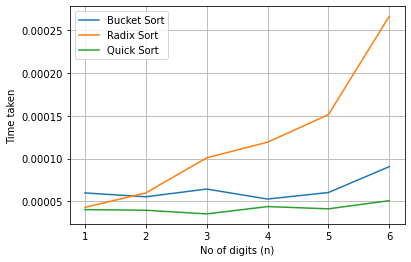

In [64]:
import time
import numpy as np
import matplotlib.pyplot as plt

digit_size = []
bucket_sort_time = []
radix_sort_time = []
quick_sort_time = []


for i in range(0,6):

    array_radix = []
    array_quick = []
    array_bucket = []
    
    n=16
    array = np.random.randint(10**i, (10**(i+1)) , n).tolist()
    digit_size.append(i+1)
    
    array_radix = array
    array_quick = array
    array_bucket = array

    #For bucket sort
    bucket_start_time = time.time()
    bucket_sorted_arr = bucket_sort(array_bucket)
    bucket_end_time = time.time()
    
    #For radix sort
    radix_start_time = time.time()
    radix_sorted_array = radix_sort(array_radix)
    radix_end_time = time.time()

   
    #For quick sort
    quick_start_time = time.time()
    quick_sorted_array = quick_sort(array_quick, 0, len(array_quick)-1)
    quick_end_time = time.time()
    
   
    bucket_sort_time.append(bucket_end_time-bucket_start_time)
    radix_sort_time.append(radix_end_time-radix_start_time)
    quick_sort_time.append(quick_end_time-quick_start_time)
    
#     print("bucket sorted array", bucket_sorted_arr)
#     print("radix sorted array", radix_sorted_array)
#     print("quick sorted array", quick_sorted_array)

    
print(bucket_sort_time)
print(radix_sort_time)
print(quick_sort_time)
plt.xlabel('No of digits (n)')
plt.ylabel('Time taken')
plt.plot(digit_size, bucket_sort_time, label ='Bucket Sort')
plt.plot(digit_size, radix_sort_time, label = "Radix Sort")
plt.plot(digit_size, quick_sort_time, label = "Quick Sort")
plt.grid()
plt.legend()
plt.show()

Discussion -

As we know from the theory, the time complexity of radix sort is O(d*n) and the time complexity of quick sort is O(nlgn). So, initially the radix sort is faster than the quick sort but as the number of digits increases the time complexity of radix sort gets higher than that of quick sort. The graph plotted depicts increase in time taken by radix sort as digits increase, but it could not clearly depict the phenomenon as the time taken by the computer was very small and even the tiniest fluctuation gave change in the graph. 

Also, it was observed that time taken by the processor also highly depends on the code written. Radix sort was taking higher time initially when C was created to the size of array. When size of C was changed to the size of digits, the performance  improved drastically.